In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv('../Dataset/crime_safety_dataset.csv')


df.head()

,id,date,time,crime_type,city,state,location_description,victim_age,victim_gender,victim_race
0,1,2022-09-09,18:58:57,Homicide,Philadelphia,PA,9916 Broadway,34,Male,Other
1,2,2022-07-10,12:10:59,Assault,Phoenix,AZ,6853 Oak St,13,Female,Black
2,3,2024-12-31,09:26:12,Burglary,San Antonio,TX,3760 Maple Ave,23,Male,Asian
3,4,2024-04-12,23:17:28,Vandalism,Philadelphia,PA,6781 Main St,36,Other,Asian
4,5,2023-07-19,04:49:39,Fraud,San Antonio,TX,3239 Broadway,26,Other,Other


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    1000 non-null   int64 
 1   date                  1000 non-null   object
 2   time                  1000 non-null   object
 3   crime_type            1000 non-null   object
 4   city                  1000 non-null   object
 5   state                 1000 non-null   object
 6   location_description  1000 non-null   object
 7   victim_age            1000 non-null   int64 
 8   victim_gender         1000 non-null   object
 9   victim_race           1000 non-null   object
dtypes: int64(2), object(8)
memory usage: 78.3+ KB


In [6]:
df.describe()

,id,victim_age
count,1000.000000,1000.000000
mean,500.500000,52.201000
std,288.819436,22.913831
min,1.000000,12.000000
25%,250.750000,33.000000
50%,500.500000,53.000000
75%,750.250000,72.000000
max,1000.000000,90.000000


In [7]:
df.isnull().sum()

id                      0
date                    0
time                    0
crime_type              0
city                    0
state                   0
location_description    0
victim_age              0
victim_gender           0
victim_race             0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

id                       int64
date                    object
time                    object
crime_type              object
city                    object
state                   object
location_description    object
victim_age               int64
victim_gender           object
victim_race             object
dtype: object

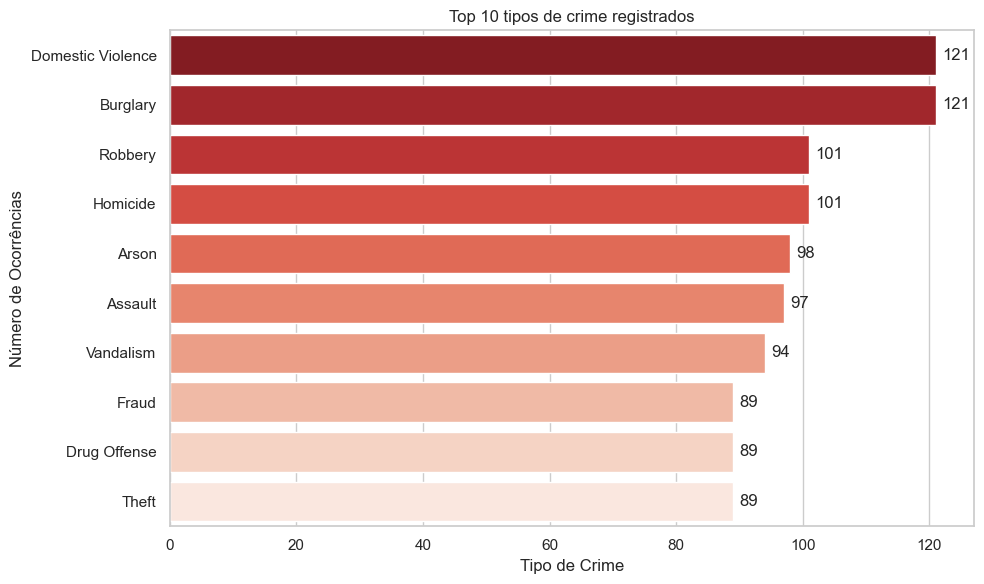

In [21]:
plt.figure(figsize=(10, 6))
crime_counts = df['crime_type'].value_counts().head(10).sort_values(ascending=False)
sns.barplot(y=crime_counts.index, x=crime_counts.values, palette='Reds_r')
plt.title('Top 10 tipos de crime registrados')
plt.xlabel('Tipo de Crime')
plt.ylabel('Número de Ocorrências')

for index, value in enumerate(crime_counts.values):
    plt.text(value + 1, index, str(value), va='center')

plt.tight_layout()
plt.show()

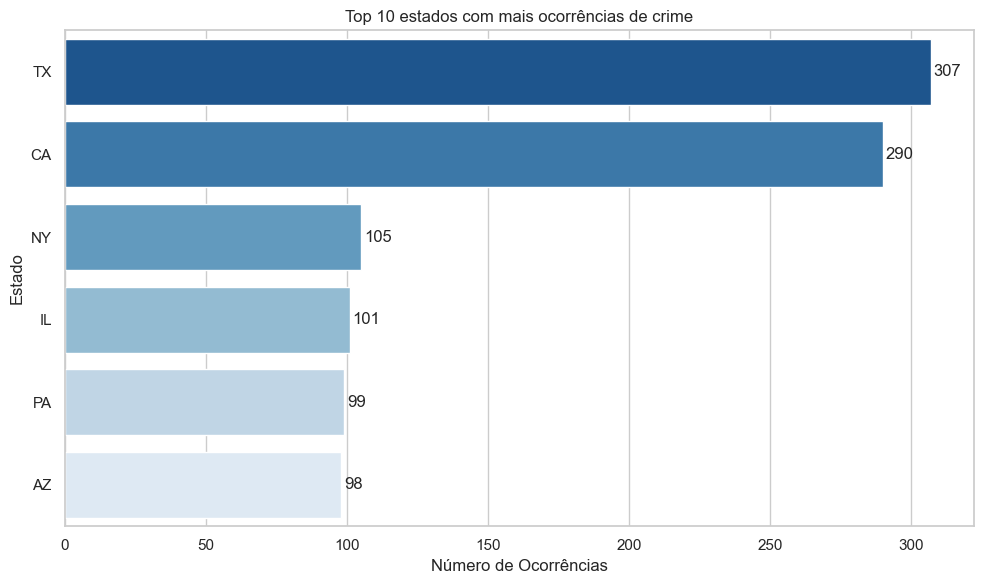

In [29]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
state_counts = df['state'].value_counts().head(10).sort_values(ascending=False)

sns.barplot(y=state_counts.index, x=state_counts.values, palette='Blues_r')
plt.title('Top 10 estados com mais ocorrências de crime')
plt.xlabel('Número de Ocorrências')
plt.ylabel('Estado')
for index, value in enumerate(state_counts.values):
    plt.text(value + 1, index, str(value), va='center')
plt.tight_layout()
plt.show()

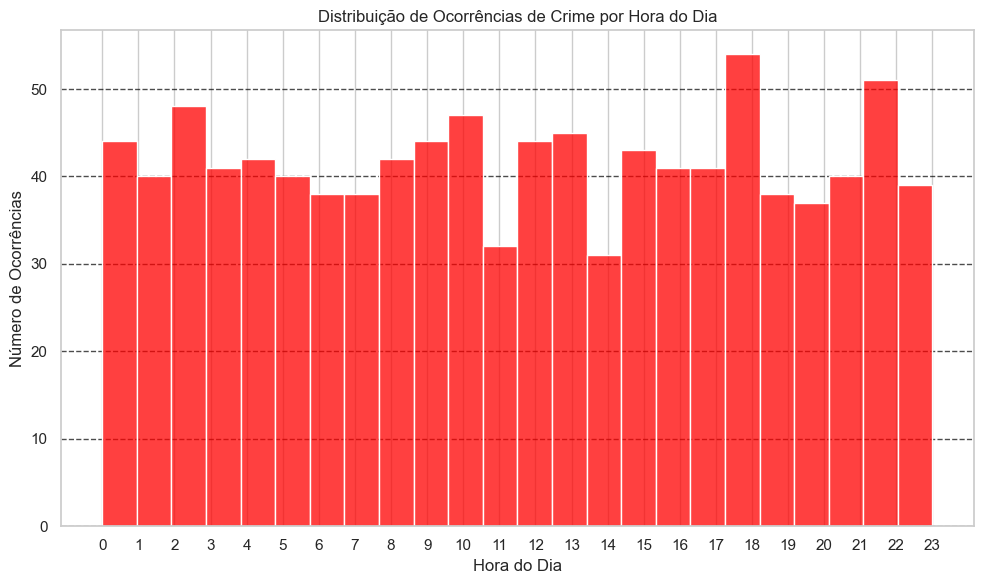

In [50]:
df['hora'] = pd.to_datetime(df['time'], errors='coerce').dt.hour

plt.figure(figsize=(10, 6))
hour_counts = df['hora'].value_counts().sort_index()

sns.histplot(df['hora'].dropna(), bins=24, kde=False, color='red')

# for hour, count in hour_counts.items():
#     plt.text(hour, count + 1, str(count), ha='center', va='bottom') 

plt.title('Distribuição de Ocorrências de Crime por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Ocorrências')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='black')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

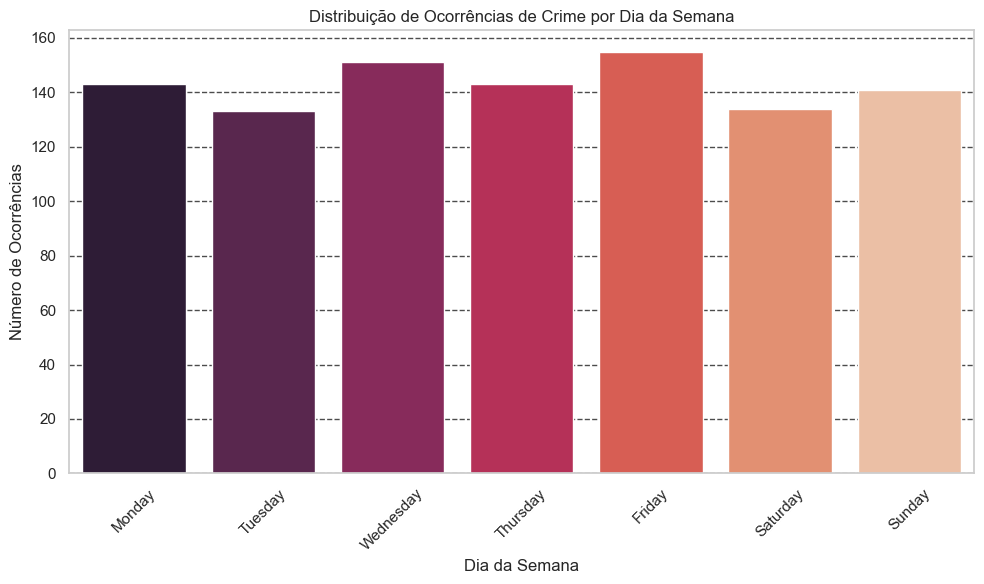

In [57]:
df['day_of_week'] = pd.to_datetime(df['date'], errors='coerce').dt.day_name()


plt.figure(figsize=(10, 6))

sns.countplot(data=df, x=df['day_of_week'], palette='rocket', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
              
plt.title('Distribuição de Ocorrências de Crime por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7, color='black')
plt.tight_layout()
plt.show()

In [58]:
df['day_of_week'].value_counts()

day_of_week
Friday       155
Wednesday    151
Thursday     143
Monday       143
Sunday       141
Saturday     134
Tuesday      133
Name: count, dtype: int64

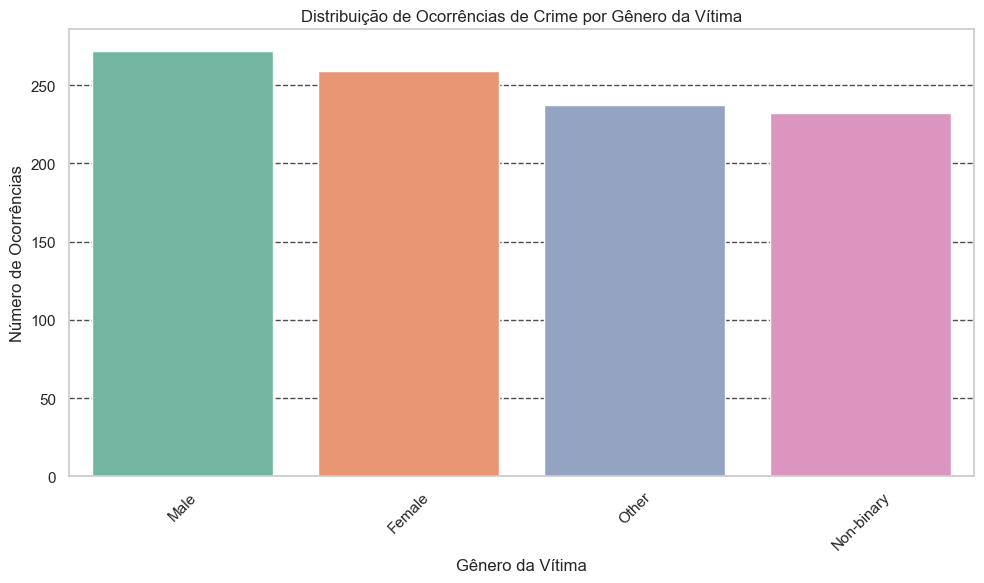

In [59]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='victim_gender', palette='Set2')
plt.title('Distribuição de Ocorrências de Crime por Gênero da Vítima')
plt.xlabel('Gênero da Vítima')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7, color='black')
plt.tight_layout()
plt.show()

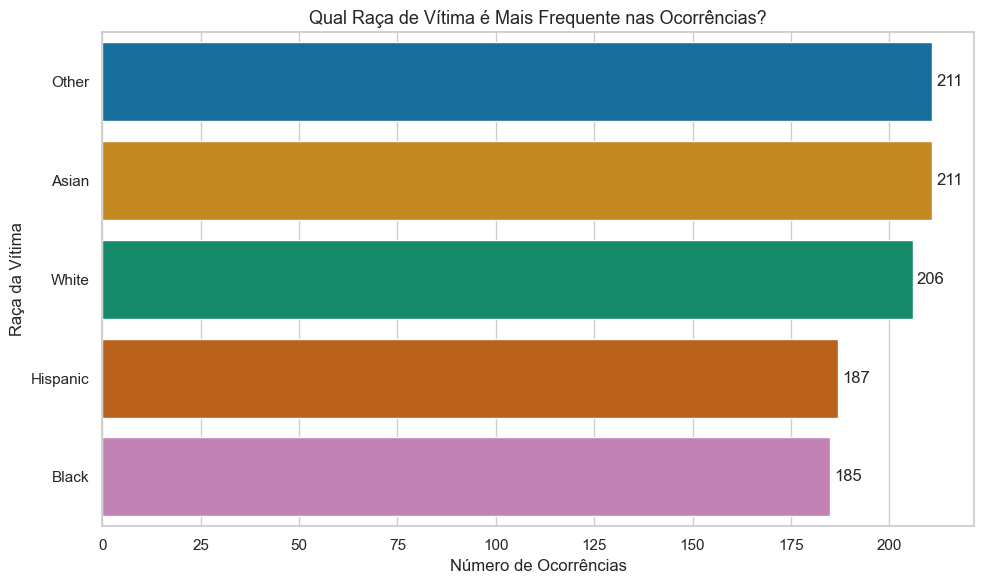

In [83]:
plt.figure(figsize=(10, 6))

order = df['victim_race'].value_counts().index
vitima_counts = df['victim_race'].value_counts().sort_values(ascending=False)

sns.countplot(data=df, y='victim_race', order=order, palette='colorblind')
plt.title('Qual Raça de Vítima é Mais Frequente nas Ocorrências?', fontsize=13)
plt.xlabel('Número de Ocorrências')
plt.ylabel('Raça da Vítima')

for i, value in enumerate(vitima_counts):
    plt.text(value + 1, i, str(value), va='center')

plt.tight_layout()
plt.show()

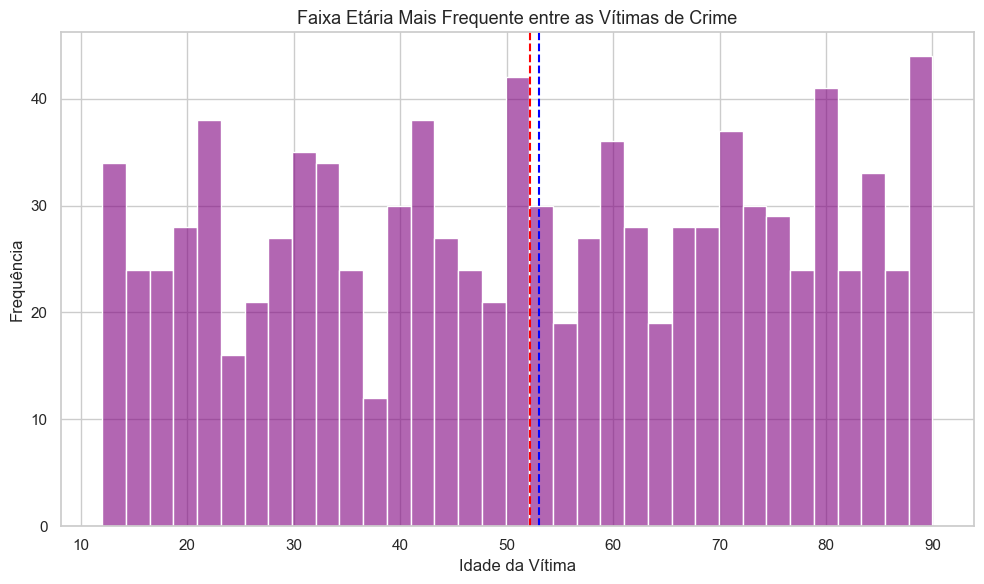

In [82]:
plt.figure(figsize=(10, 6))

sns.histplot(df['victim_age'].dropna(), bins=35, kde=False, color='purple', alpha=0.6)

media = df['victim_age'].mean()
mediana = df['victim_age'].median()
plt.axvline(media, color='red', linestyle='--', label=f'Média: {media:.2f}')
plt.axvline(mediana, color='blue', linestyle='--', label=f'Mediana: {mediana:.2f}')

plt.title('Faixa Etária Mais Frequente entre as Vítimas de Crime', fontsize=13)
plt.xlabel('Idade da Vítima')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


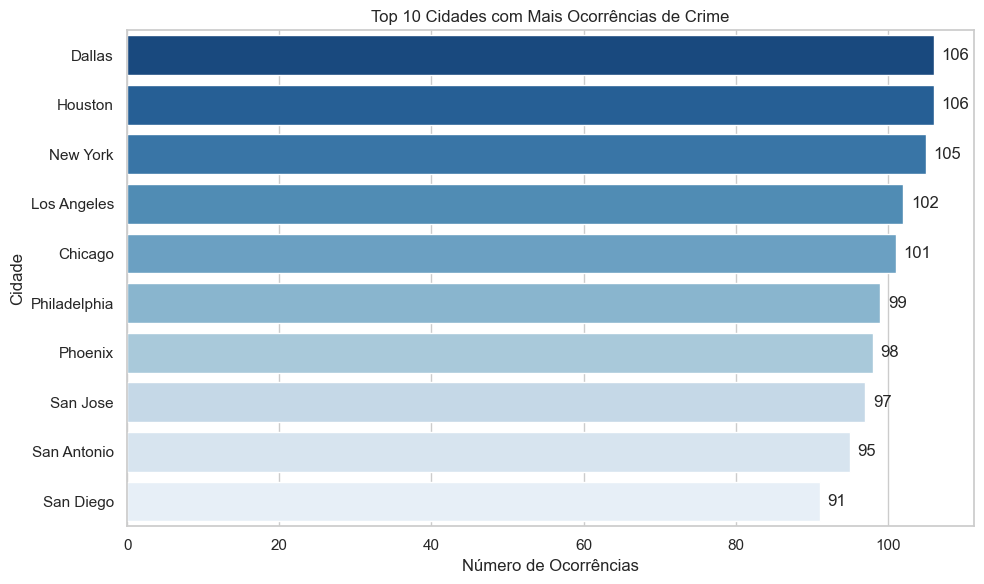

In [84]:
plt.figure(figsize=(10, 6))

city_counts = df['city'].value_counts().head(10).sort_values(ascending=False)

sns.barplot(x=city_counts.values, y=city_counts.index, palette='Blues_r')

plt.title('Top 10 Cidades com Mais Ocorrências de Crime')
plt.xlabel('Número de Ocorrências')
plt.ylabel('Cidade')
for index, value in enumerate(city_counts.values):
    plt.text(value + 1, index, str(value), va='center')
plt.tight_layout()
plt.show()

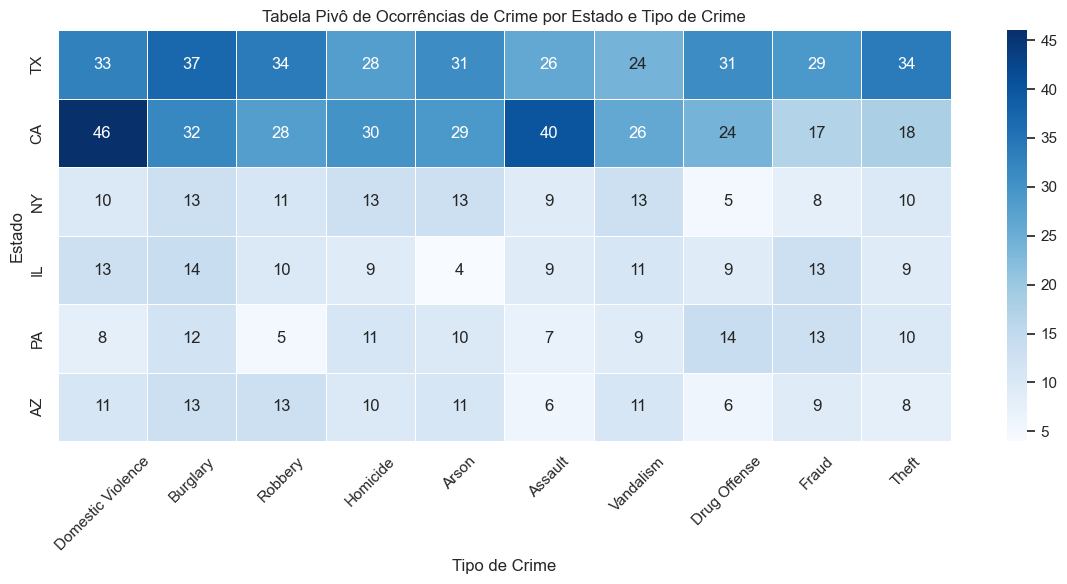

In [94]:
top_crimes = df['crime_type'].value_counts().head(10).index
df_filtrado = df[df['crime_type'].isin(top_crimes)]

pivot_table = pd.crosstab(df_filtrado['state'], df_filtrado['crime_type'])

state_order = pivot_table.sum(axis=1).sort_values(ascending=False).index
crime_order = pivot_table.sum(axis=0).sort_values(ascending=False).index
pivot_table = pivot_table.loc[state_order, crime_order]


plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='d', linewidths=0.5)

plt.title('Tabela Pivô de Ocorrências de Crime por Estado e Tipo de Crime')
plt.xlabel('Tipo de Crime')
plt.ylabel('Estado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()